In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
abalone = pd.read_csv('abalone/abalone.data')

In [3]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   0.455   4176 non-null   float64
 2   0.365   4176 non-null   float64
 3   0.095   4176 non-null   float64
 4   0.514   4176 non-null   float64
 5   0.2245  4176 non-null   float64
 6   0.101   4176 non-null   float64
 7   0.15    4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
abalone.describe()

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


#### check rows for missing, na or null values. if found, chuck 'em

In [5]:
# Check for missing values in the entire DataFrame
missing_values = abalone.isnull().sum()
print(missing_values)

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64


In [6]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
abalone.columns = column_names
abalone

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


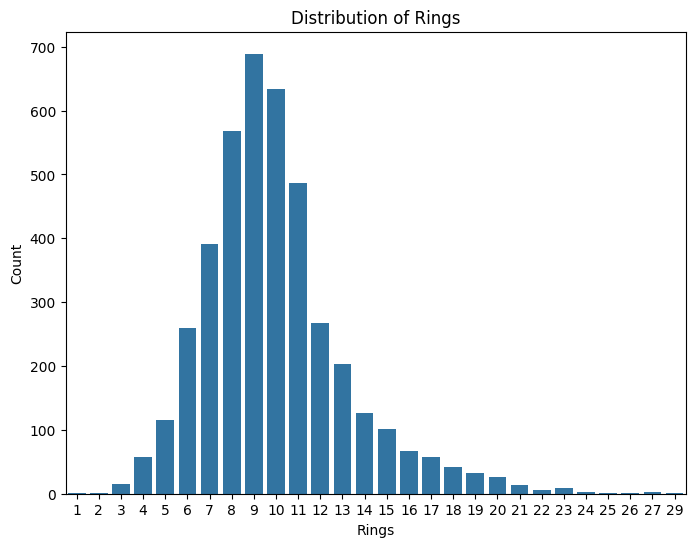

In [10]:
# Plot the distribution of the 'class' feature (11 Rings And Up vs. Below 11 Rings)
plt.figure(figsize=(8, 6))
sns.countplot(data=abalone, x='Rings')
plt.title('Distribution of Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()

#### Drop the rows where infant is the sex because they have ages below 11 and would skew the later binary split

In [11]:
# Filter the dataset for infants
infants = abalone[abalone['Sex'] == 'I']

# Calculate the average ring age for infants
average_ring_age_infants = infants['Rings'].mean()

print(f'The average ring age for infants is: {average_ring_age_infants:.2f}')

The average ring age for infants is: 7.89


In [12]:
# Drop rows where the 'Sex' is 'I'
abalone_no_infants = abalone[abalone['Sex'] != 'I']

In [14]:
print(abalone_no_infants.head())
print(abalone_no_infants.shape)

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
2   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
5   F   0.530     0.415   0.150        0.7775          0.2370          0.1415   
6   F   0.545     0.425   0.125        0.7680          0.2940          0.1495   

   Shell_weight  Rings  
0         0.070      7  
1         0.210      9  
2         0.155     10  
5         0.330     20  
6         0.260     16  
(2834, 9)


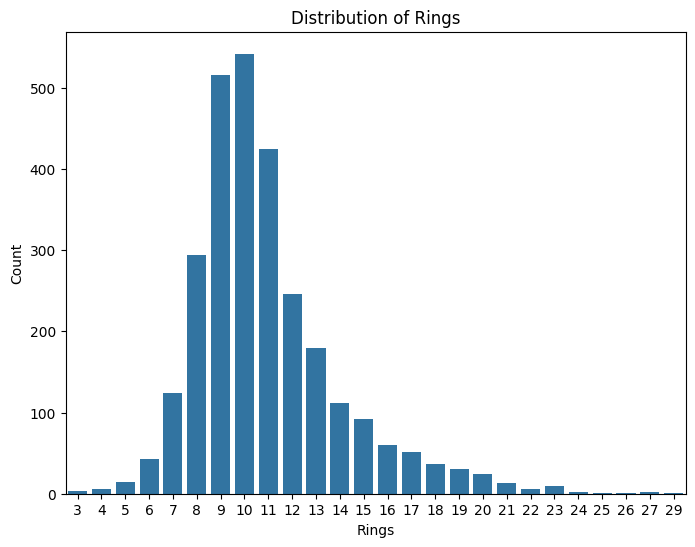

In [15]:
# Plot the distribution of the 'class' feature (edible vs. poisonous)
plt.figure(figsize=(8, 6))
sns.countplot(data=abalone_no_infants, x='Rings')
plt.title('Distribution of Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()

In [16]:
abalone = abalone_no_infants

#### Considering how counts drop significantly after age 11, we use threshold age of 11 to do a binary split on the rings age.

In [17]:
# Create the binary target variable, 1 if old, 0 if not
abalone.loc[:, '11_Rings_Or_More'] = abalone['Rings'].apply(lambda x: 1 if x >= 11 else 0)
abalone

/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/ipykernel_66076/131238396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone.loc[:, '11_Rings_Or_More'] = abalone['Rings'].apply(lambda x: 1 if x >= 11 else 0)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,11_Rings_Or_More
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,1
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16,1
...,...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


In [18]:
abalone['11_Rings_Or_More'].value_counts()

11_Rings_Or_More
0    1543
1    1291
Name: count, dtype: int64

/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/ipykernel_66076/707345489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='11_Rings_Or_More', data=abalone, palette='viridis')


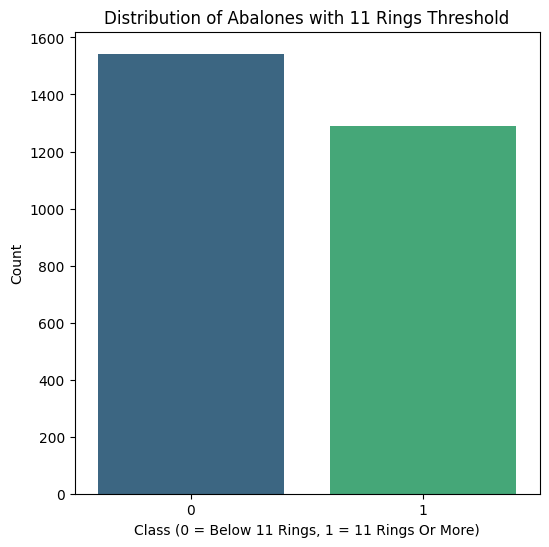

In [19]:
# Visualize the distribution of the binary target variable 'Old'
plt.figure(figsize=(6, 6))
sns.countplot(x='11_Rings_Or_More', data=abalone, palette='viridis')
plt.title('Distribution of Abalones with 11 Rings Threshold')
plt.xlabel('Class (0 = Below 11 Rings, 1 = 11 Rings Or More)')
plt.ylabel('Count')
plt.show()

#### One-hot-encode the Sex column

In [20]:
abalone = pd.get_dummies(abalone, columns=['Sex'], drop_first=True)
abalone.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,11_Rings_Or_More,Sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,True
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,False
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,True
5,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,1,False
6,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,1,False


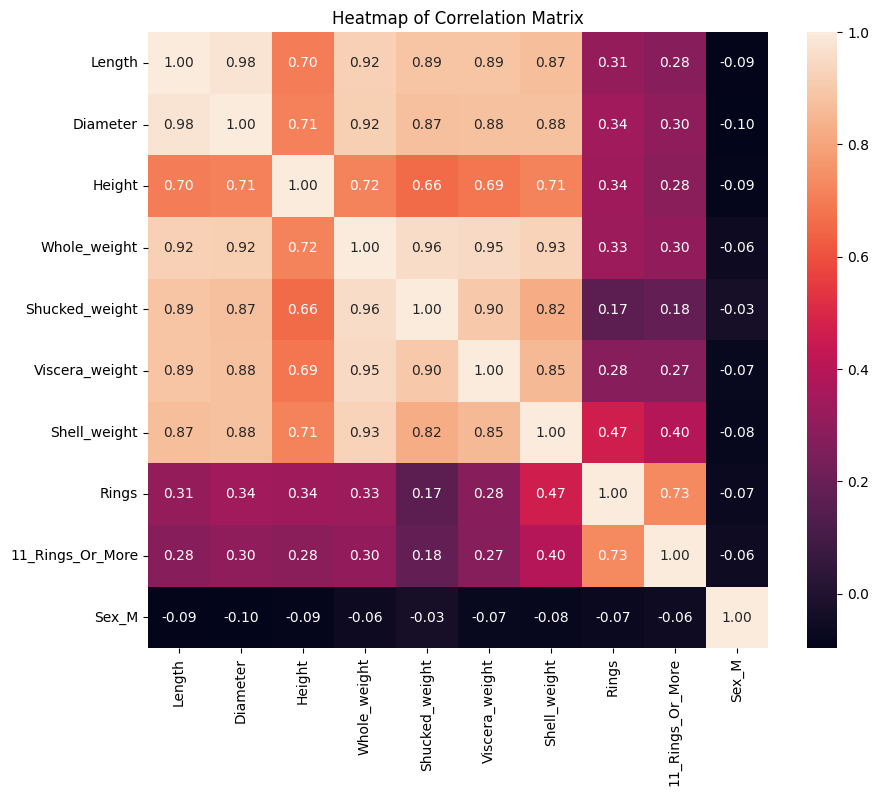

In [21]:
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = abalone.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/ipykernel_66076/260955181.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=abalone, x=column, palette='viridis', order=abalone[column].value_counts().index, ax=axes[i])
/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/ipykernel_66076/260955181.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=abalone, x=column, palette='viridis', order=abalone[column].value_counts().index, ax=axes[i])
/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/ipykernel_66076/260955181.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

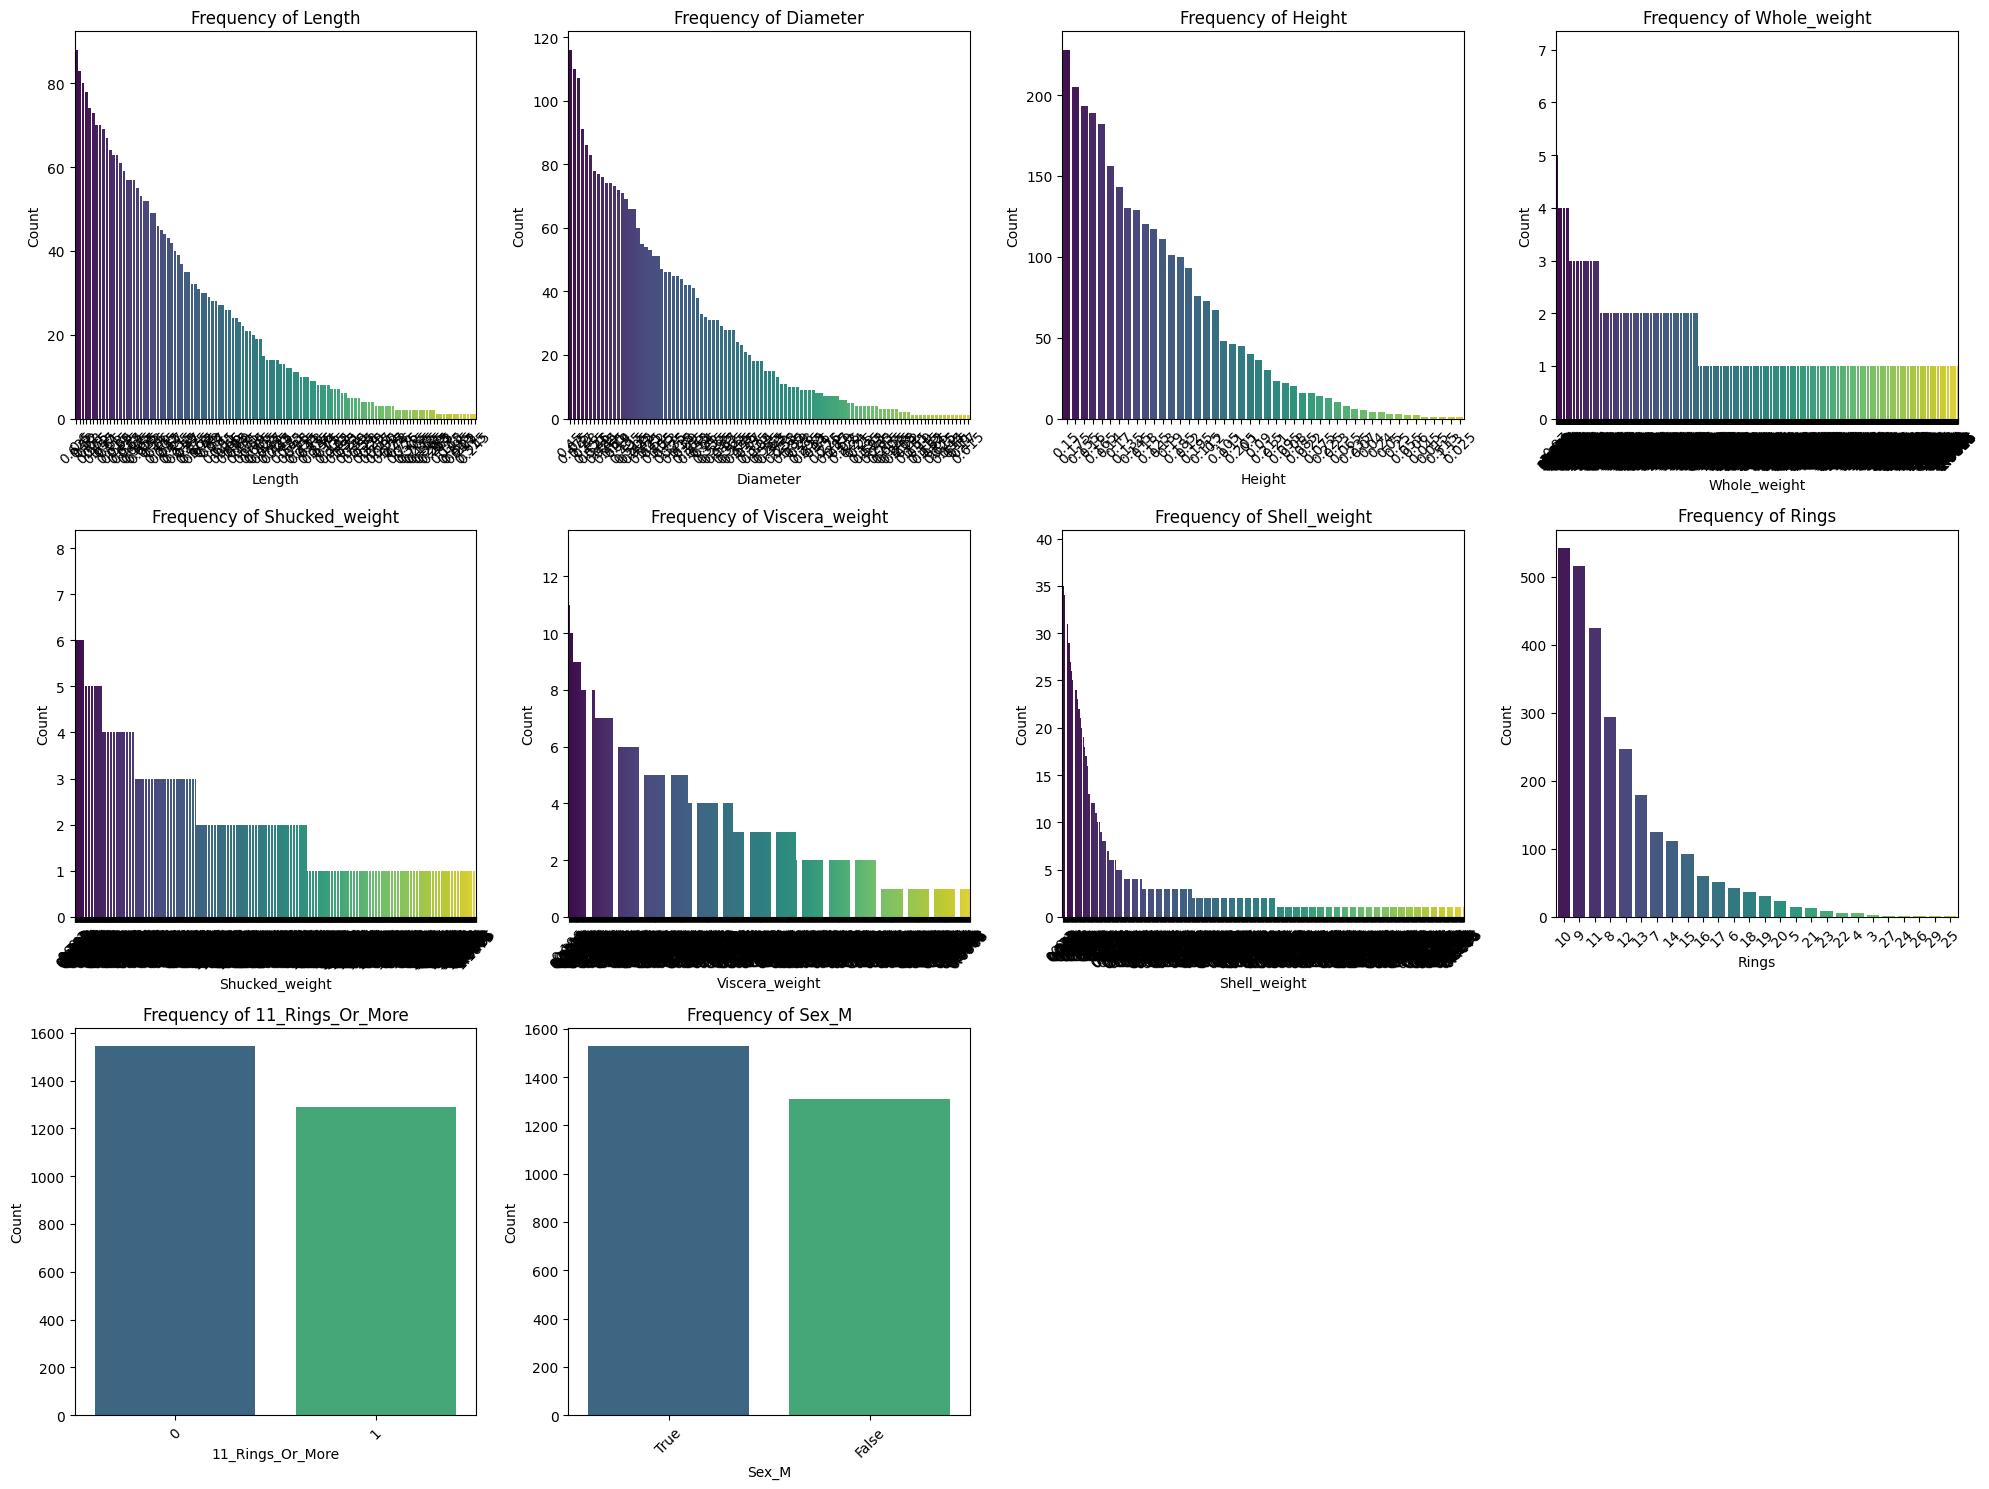

In [22]:
# Number of columns to display in the subplot grid
num_cols = 4

# Calculate the number of rows needed
num_rows = (len(abalone.columns) + num_cols - 1) // num_cols

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Plot the frequency of categories for each feature as subplots
for i, column in enumerate(abalone.columns):
    sns.countplot(data=abalone, x=column, palette='viridis', order=abalone[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Frequency of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [23]:
# Separate features and target
feature_variables = abalone.drop(columns=['Rings', '11_Rings_Or_More'])
target_variable = abalone['11_Rings_Or_More']